# 2. 단순모멘텀 전략 3,6,9,12개월

In [1]:
import pandas as pd
import numpy as np

# Finance Library import
from Library import FinanceLibrary as fl

### csv 파일 읽어오기

In [2]:
df_kospi = pd.read_csv("..\\Data\\KOSPI_Daily_1980data.csv", encoding="utf-8")

##### 주간, 월간데이타 만들기

In [3]:
df_kospi["Date"] = pd.to_datetime(df_kospi["Date"])  # Converting date to pandas datetime format
df_kospi["Year"] = df_kospi["Date"].dt.year  # Getting year number
df_kospi["Month"] = df_kospi["Date"].dt.month  # Getting month number
df_kospi["Week_Number"] = df_kospi["Date"].dt.week  # Getting week number
df_kospi["WeekDay"] = df_kospi["Date"].dt.weekday
df_kospi.index = pd.to_datetime(df_kospi["Date"])
# 주간, 월간 Data만들기
df_kospi_week = df_kospi.groupby(["Year","Week_Number"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_kospi_week = df_kospi_week.reset_index()
df_kospi_week.index = pd.to_datetime(df_kospi_week["Date"])
df_kospi_month = df_kospi.groupby(["Year","Month"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_kospi_month = df_kospi_month.reset_index()
df_kospi_month.index = pd.to_datetime(df_kospi_month["Date"])

##### Re-Scale

In [4]:
KOSPI_daily = df_kospi["Close"]/df_kospi["Close"][0]
KOSPI_daily = KOSPI_daily.sort_index()
KOSPI_week = df_kospi_week["Close"]/df_kospi_week["Close"][0]
KOSPI_week = KOSPI_week.sort_index()
KOSPI_month = df_kospi_month["Close"]/df_kospi_month["Close"][0]
KOSPI_month = KOSPI_month.sort_index()

##### 월별 수익률

In [5]:
KOSPI_month = pd.DataFrame(KOSPI_month, index=KOSPI_month.index)
KOSPI_month["YesterdayReturn"] = fl.YesterdayReturn(KOSPI_month)
KOSPI_month["YesterdayReturn"][0] = 1 #처음 값은 1로 지정한다

In [19]:
# 수익률 계산 = 어제 수익률(today/yesterday)을 index[1]에 구하고 * 어제 모멘텀값을 오늘 indx[1]로 불러온다
KOSPI_month["m3"] = KOSPI_month["YesterdayReturn"] * fl.SimpleMomentum(KOSPI_month["Close"],3).shift(1)
KOSPI_month["m3"][0] = 1 #처음 값은 1로 지정한다
KOSPI_month["m6"] = KOSPI_month["YesterdayReturn"] * fl.SimpleMomentum(KOSPI_month["Close"],6).shift(1)
KOSPI_month["m6"][0] = 1 #처음 값은 1로 지정한다
KOSPI_month["m9"] = KOSPI_month["YesterdayReturn"] * fl.SimpleMomentum(KOSPI_month["Close"],9).shift(1)
KOSPI_month["m9"][0] = 1 #처음 값은 1로 지정한다
KOSPI_month["m12"] = KOSPI_month["YesterdayReturn"] * fl.SimpleMomentum(KOSPI_month["Close"],12).shift(1)
KOSPI_month["m12"][0] = 1 #처음 값은 1로 지정한다

In [20]:
prod_m1 = np.cumprod(KOSPI_month["YesterdayReturn"])
prod_m3 = np.cumprod(KOSPI_month["m3"])
prod_m6 = np.cumprod(KOSPI_month["m6"])
prod_m9 = np.cumprod(KOSPI_month["m9"])
prod_m12 = np.cumprod(KOSPI_month["m12"])

In [21]:
m1 = fl.Portfolio(prod_m1,"Momentum1")
m3 = fl.Portfolio(prod_m3,"Momentum3")
m6 = fl.Portfolio(prod_m6,"Momentum6")
m9 = fl.Portfolio(prod_m9,"Momentum9")
m12 = fl.Portfolio(prod_m12,"Momentum12")
result = pd.concat([m1,m3,m6,m9,m12],axis=1)
pd.DataFrame(result).T

,Initial Balnce,Final Balance,CAGR,Std,Max.Drawdown,Sharpe Ratio
Momentum1,1.0,20.061196,7.7851,6.514851,-73.0577,0.121732
Momentum3,1.0,23.329761,8.4113,8.535344,-51.3903,0.206239
Momentum6,1.0,28.341527,9.1998,9.801945,-32.4198,0.218689
Momentum9,1.0,17.524547,8.2794,6.243841,-39.1969,0.190222
Momentum12,1.0,28.251315,9.1906,9.897025,-35.6439,0.210384


In [22]:
KOSPI_month["prod_m3"] = prod_m3
KOSPI_month["prod_m6"] = prod_m6
KOSPI_month["prod_m9"] = prod_m9
KOSPI_month["prod_m12"] = prod_m12

In [23]:
KOSPI_month.head()

,Close,YesterdayReturn,m3,m6,m9,m12,prod_m3,prod_m6,prod_m9,prod_m12
Date,,,,,,,,,,
1980-01-31,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0
1980-02-29,0.979696,0.979696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-31,0.991595,1.012146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-30,1.096326,1.105619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-05-31,1.099537,1.002929,1.002929,NaN,NaN,NaN,1.002929,NaN,NaN,NaN


### 그래프

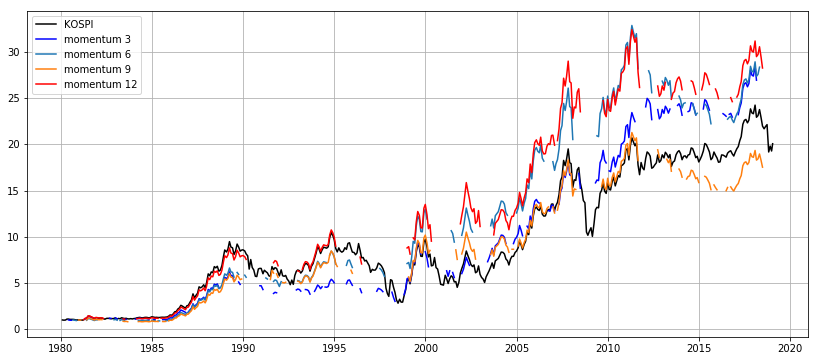

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)
ax.plot(prod_m1,color="Black",label="KOSPI");
ax.plot(prod_m3,color="Blue",label="momentum 3");
ax.plot(prod_m6,label="momentum 6");
ax.plot(prod_m9,label="momentum 9");
ax.plot(prod_m12,color="Red",label="momentum 12");
ax.legend()
ax.grid()